# FIL sentinel query

Notebook for performing quick queries

In [1]:
%load_ext autotime

In [8]:
import json
import requests as req
import plotly.express as px
import pandas as pd
from sqlalchemy import create_engine

pd.options.plotting.backend = "plotly"

CONN_STRING_PATH = '../config/sentinel-conn-string.txt'

with open(CONN_STRING_PATH, 'r') as fid:
    conn_string = fid.read()


time: 36.9 ms


In [18]:
connection = create_engine(conn_string, pool_recycle=3600).connect()
QUERY = """
        SELECT 
        cp.*,
        bh.*
        from chain_powers cp
        JOIN block_headers bh
        ON cp.state_root = bh.parent_state_root
        ORDER BY bh.timestamp
        LIMIT 10000
        """

df = (pd.read_sql(QUERY, connection)
        .assign(timestamp=lambda df: pd.to_datetime(df.timestamp, unit='s'))
        .set_index("timestamp")
        )

time: 6.52 s


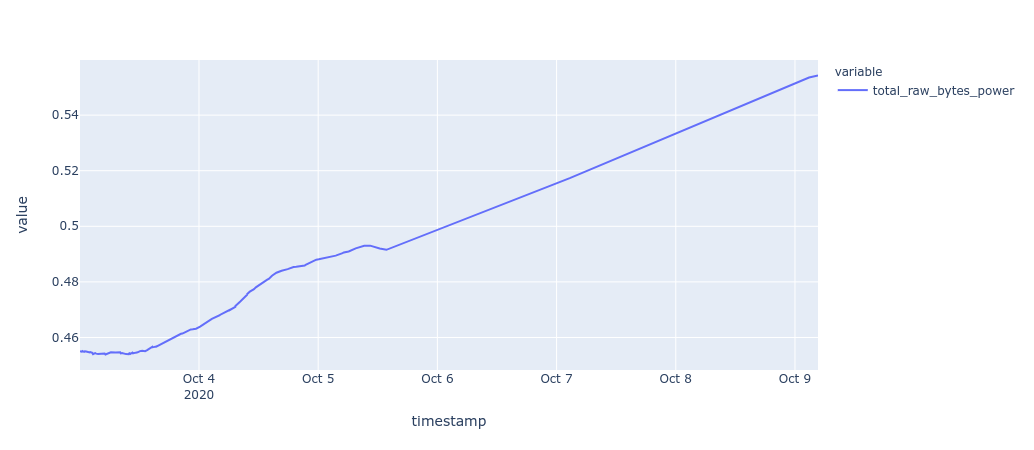

time: 80.7 ms


In [19]:
y = df.total_raw_bytes_power.astype(float) * 1e-18 # PiB
y.plot()